# Data Preprocessing

In [49]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#load data into a dataframe
df = pd.read_csv("Data/fer2013.csv")

In [3]:
#analyze the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


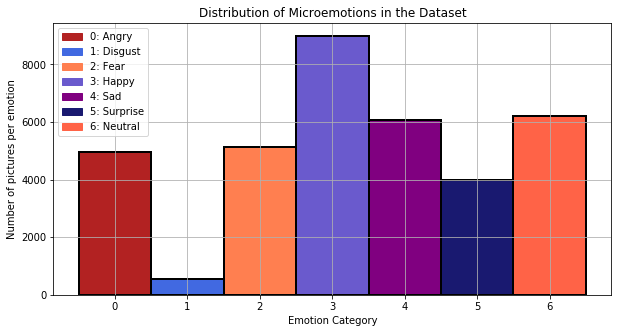

In [59]:
#plot the distribution of emotions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

N, bins, patches = ax.hist(df['emotion'], bins=range(0,8), histtype='bar', align='left', edgecolor='black', linewidth=2)
plt.xlabel("Emotion Category")
plt.ylabel("Number of pictures per emotion")
plt.title("Distribution of Microemotions in the Dataset")
plt.grid(True)

colors = ['firebrick', 'royalblue', 'coral', 'slateblue', 'purple', 'midnightblue', 'tomato']
emotions = ['0: Angry', '1: Disgust', '2: Fear', '3: Happy', '4: Sad', '5: Surprise', '6: Neutral']

handles = []
for i, color in enumerate(colors):
    patches[i].set_facecolor(color)
    handles.append(mpatches.Patch(color=color, label=emotions[i]))
    
plt.legend(handles=handles)

plt.show()

## Data Preprocessing

In [60]:
#split the 'pixels' string by whitespace and save the result as a list
X = df['pixels'].apply(np.core.defchararray.split)

In [61]:
#create a numpy array and transform str into int simultaneously
X = np.array([list(map(int, x)) for x in X])

In [62]:
#Reshape into a 4 dimensional numpy array
X = X.reshape(X.shape[0], 48, 48, 1)

In [63]:
#transform the emotion output into a numpy array
y = df['emotion'].values

## Data Splitting

In [64]:
#use the stratify command in order to keep the distributions similar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

## Draw the data

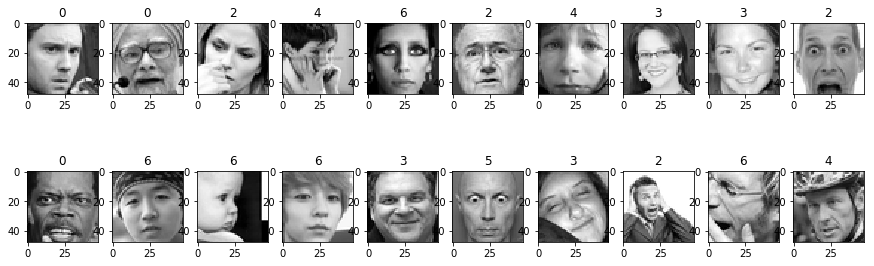

In [65]:
#draw the first 20 images
fig = plt.figure(figsize=(15, 5))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(np.squeeze(X[i]), cmap='gray')
    ax.set_title(y[i])

## Data Rescaling

In [66]:
#between 0 and 1
#TODO Check distribution of X values
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## One Hot Encoding

In [67]:
from keras.utils import np_utils

# one hot encoding for the 7 categories
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)

c:\users\avadi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Multilayer Perceptron

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 1,446,407
Trainable params: 1,446,407
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [89]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP_emotion.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, 
                 validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/10
22967/22967 [==============================] - 3s 113us/step - loss: 1.6713 - acc: 0.3404 - val_loss: 1.7201 - val_acc: 0.3055

Epoch 00001: val_loss improved from inf to 1.72007, saving model to MLP_emotion.model.best.hdf5
Epoch 2/10
22967/22967 [==============================] - 2s 95us/step - loss: 1.6653 - acc: 0.3453 - val_loss: 1.7325 - val_acc: 0.3264

Epoch 00002: val_loss did not improve from 1.72007
Epoch 3/10
22967/22967 [==============================] - 2s 97us/step - loss: 1.6609 - acc: 0.3402 - val_loss: 1.6445 - val_acc: 0.3610

Epoch 00003: val_loss improved from 1.72007 to 1.64447, saving model to MLP_emotion.model.best.hdf5
Epoch 4/10
22967/22967 [==============================] - 2s 97us/step - loss: 1.6527 - acc: 0.3516 - val_loss: 1.6598 - val_acc: 0.3579

Epoch 00004: val_loss did not improve from 1.64447
Epoch 5/10
22967/22967 [==============================] - 2s 99us/step - loss: 1.6416 - acc: 0.3553 

In [90]:
model.load_weights('MLP_emotion.model.best.hdf5')

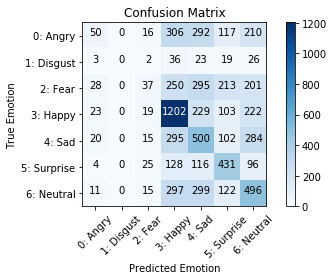

In [106]:
#TODO Adjust to your style
from sklearn.metrics import confusion_matrix
import itertools

prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)

cm = confusion_matrix(true, prediction)

plt.imshow(cm, plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(emotions))
plt.xticks(tick_marks, emotions, rotation=45)
plt.yticks(tick_marks, emotions)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


plt.ylabel('True Emotion')
plt.xlabel('Predicted Emotion')
plt.tight_layout()

## Convolutional Neural Networks

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)         32896     
__________

In [26]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='CNN_emotion.model.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=50,
          validation_split=0.2, callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/50
 - 5s - loss: 1.8160 - acc: 0.2420 - val_loss: 1.7512 - val_acc: 0.2849

Epoch 00001: val_loss improved from inf to 1.75120, saving model to CNN_emotion.model.best.hdf5
Epoch 2/50
 - 3s - loss: 1.7096 - acc: 0.3172 - val_loss: 1.6080 - val_acc: 0.3746

Epoch 00002: val_loss improved from 1.75120 to 1.60801, saving model to CNN_emotion.model.best.hdf5
Epoch 3/50
 - 3s - loss: 1.6028 - acc: 0.3758 - val_loss: 1.5466 - val_acc: 0.3918

Epoch 00003: val_loss improved from 1.60801 to 1.54661, saving model to CNN_emotion.model.best.hdf5
Epoch 4/50
 - 3s - loss: 1.5296 - acc: 0.4048 - val_loss: 1.4600 - val_acc: 0.4352

Epoch 00004: val_loss improved from 1.54661 to 1.46001, saving model to CNN_emotion.model.best.hdf5
Epoch 5/50
 - 4s - loss: 1.4746 - acc: 0.4300 - val_loss: 1.4890 - val_acc: 0.4169

Epoch 00005: val_loss did not improve from 1.46001
Epoch 6/50
 - 4s - loss: 1.4312 - acc: 0.4535 - val_loss: 1.4860 - val_acc: 0.4432



In [28]:
model.load_weights('CNN_emotion.model.best.hdf5')

from sklearn.metrics import confusion_matrix

categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)

confusion_matrix(true, prediction)

array([[ 459,    7,   74,   89,  249,    8,  105],
       [  30,   25,   12,   10,   25,    2,    5],
       [ 137,    4,  314,   73,  306,   61,  129],
       [  85,    0,   53, 1412,  120,   19,  109],
       [ 135,    2,  111,  117,  688,    6,  157],
       [  25,    1,  123,   64,   50,  476,   61],
       [  90,    0,  104,  125,  350,   10,  561]], dtype=int64)